Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2848 non-null   object 
 1   Year                 2848 non-null   int64  
 2   Status               2848 non-null   object 
 3   Population           2204 non-null   float64
 4   Hepatitis B          2306 non-null   float64
 5   Measles              2848 non-null   int64  
 6   Polio                2829 non-null   float64
 7   Diphtheria           2829 non-null   float64
 8   HIV/AIDS             2848 non-null   float64
 9   infant deaths        2848 non-null   int64  
 10  under-five deaths    2848 non-null   int64  
 11  Total expenditure    2627 non-null   float64
 12  GDP                  2406 non-null   float64
 13  BMI                  2816 non-null   float64
 14  thinness 1-19 years  2816 non-null   float64
 15  Alcohol             

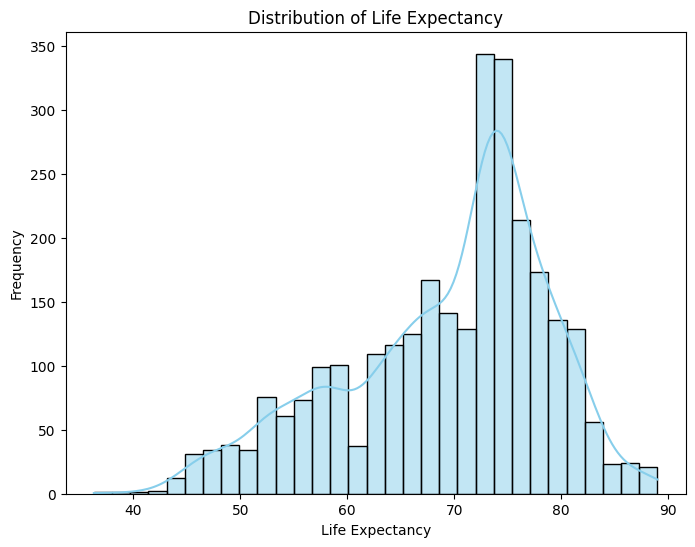

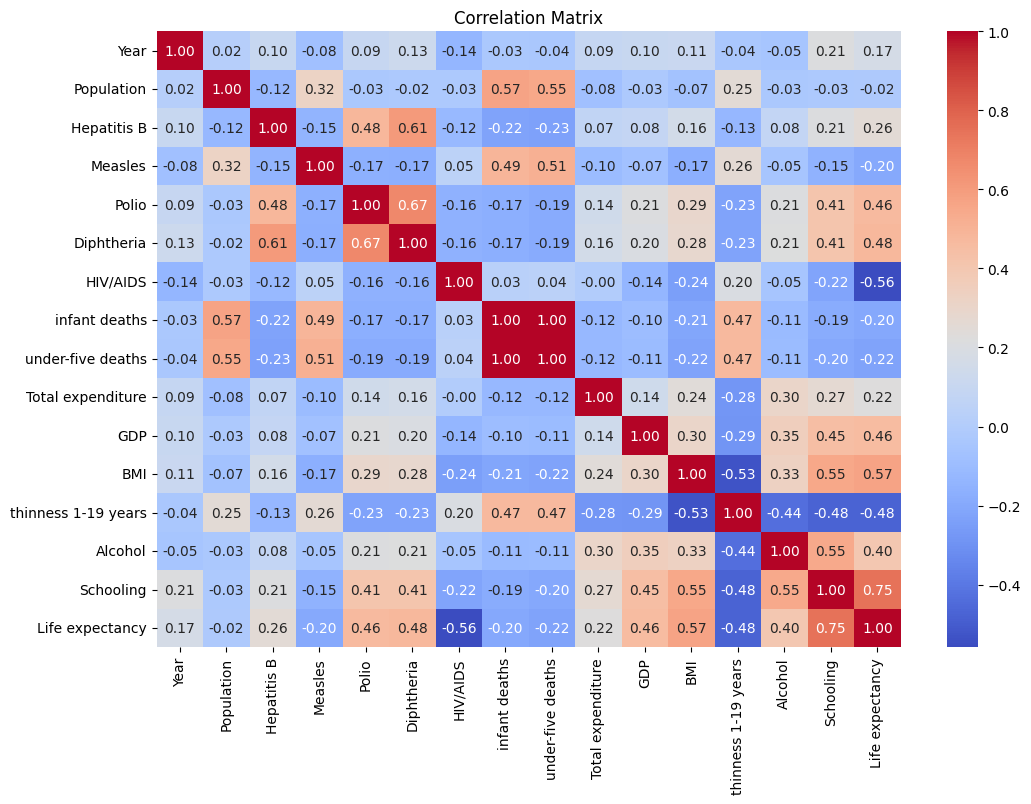

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "/content/drive/MyDrive/data/life_expectancy_data.csv"  # Adjust the path as needed
df = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Preview the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())

# Check for unique values in categorical columns
print("\nUnique values in 'Country' and 'Status':")
print("Country:", df['Country'].nunique())
print("Status:", df['Status'].unique())

# Visualize the distribution of life expectancy
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy'], kde=True, color='skyblue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

# Drop non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



Insights from the Heatmap
Strong Positive Correlations with Life Expectancy:

Schooling (0.75): Indicates a strong positive correlation, suggesting that higher levels of education are associated with higher life expectancy.
GDP (0.57): Suggests that countries with higher GDP tend to have better life expectancy.
BMI (0.53): Indicates that a healthier body mass index is linked to higher life expectancy.

Strong Negative Correlations with Life Expectancy:

HIV/AIDS (-0.56): Strong negative impact on life expectancy, highlighting its significant role as a factor affecting longevity.
Thinness 1-19 years (-0.48): Negative correlation implies malnutrition or unhealthy weights in young people lower life expectancy.

Moderate Correlations:

Diphtheria (0.48) and Hepatitis B (0.26): Higher immunization rates are moderately associated with increased life expectancy.

Redundant/Highly Correlated Features:

Infant deaths and under-five deaths have a strong correlation (>0.9) with each other. This might introduce multicollinearity, so consider keeping only one of them.
Population doesn't show a meaningful correlation with life expectancy, so it may not contribute much to the predictive model.

Features Promising for Prediction
Schooling, GDP, BMI, Diphtheria, HIV/AIDS, and Thinness 1-19 years are the most promising features based on their correlation with life expectancy.
Features like Hepatitis B and Total expenditure could still be useful in the model despite having weaker correlations.

Feature Selection Approach
Exclude Redundant Features:

Remove features that have strong correlations with each other (to reduce multicollinearity). For example:
Infant deaths and Under-five deaths: Keep only one.
Exclude features that are unlikely to have a direct impact on life expectancy, such as Population, which shows a weak correlation.
Keep Strong Predictors:

Select features with moderate to strong correlations with life expectancy (absolute value > 0.3).
Iterative Model Evaluation:

Start with the selected features and evaluate the model. Adjust if needed based on performance metrics.
Final Feature Selection
Based on your heatmap and analysis:

Selected Features for Model:

Schooling
GDP
BMI
Thinness 1-19 years
HIV/AIDS
Diphtheria
Total expenditure
Hepatitis B
Dropped Features:

Year: Doesn't provide significant variability for prediction.
Population: Very weak correlation with life expectancy.
Measles, Polio: Low correlation with life expectancy.
Infant deaths: Dropped due to high correlation with under-five deaths (redundant).

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage[missing_percentage > 0])

# Handle missing values
# Numerical columns: Fill with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

# Categorical columns: Fill with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no more missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())



Missing Values in Each Column:
Population             644
Hepatitis B            542
Polio                   19
Diphtheria              19
Total expenditure      221
GDP                    442
BMI                     32
thinness 1-19 years     32
Alcohol                188
Schooling              160
dtype: int64

Percentage of Missing Values:
Population             22.612360
Hepatitis B            19.030899
Polio                   0.667135
Diphtheria              0.667135
Total expenditure       7.759831
GDP                    15.519663
BMI                     1.123596
thinness 1-19 years     1.123596
Alcohol                 6.601124
Schooling               5.617978
dtype: float64

Missing Values After Cleaning:
0


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature Selection (based on analysis above)
selected_features = ['Schooling', 'GDP', 'BMI', 'thinness 1-19 years',
                     'HIV/AIDS', 'Diphtheria', 'Total expenditure', 'Hepatitis B']

# Define features (X) and target (y)
X = df[selected_features]
y = df['Life expectancy']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display feature coefficients
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)


Mean Squared Error: 21.39
R-squared: 0.76

Feature Coefficients:
               Feature  Coefficient
0            Schooling     1.189032
1                  GDP     0.000076
2                  BMI     0.069387
3  thinness 1-19 years    -0.133551
4             HIV/AIDS    -0.733788
5           Diphtheria     0.077867
6    Total expenditure     0.095467
7          Hepatitis B    -0.014350


How This Works
Feature Selection:

We're using the most promising features identified from the correlation heatmap.
Train-Test Split:

Splits the dataset into training (80%) and testing (20%) subsets to evaluate the model's performance on unseen data.
Model Training:

Uses a simple Linear Regression model.
Evaluation:

MSE (Mean Squared Error): Measures the average squared difference between actual and predicted values (lower is better).
R-squared (R²): Shows how much variation in life expectancy is explained by the model (closer to 1 is better).

Interpretation of Results
Mean Squared Error (MSE): 21.39

This value indicates the average squared difference between the predicted and actual life expectancy values.
While it provides a sense of prediction accuracy, it's hard to evaluate without comparing to the range of the target variable (life expectancy). For instance, if life expectancy ranges from 50 to 90 years, an error of ~21 might need improvement.
R-squared (R²): 0.76

This value means that 76% of the variance in life expectancy is explained by the model.
An R² of 0.76 is good but not perfect, which suggests there’s room for improvement, either by tweaking the features, using more advanced models, or addressing nonlinear relationships.

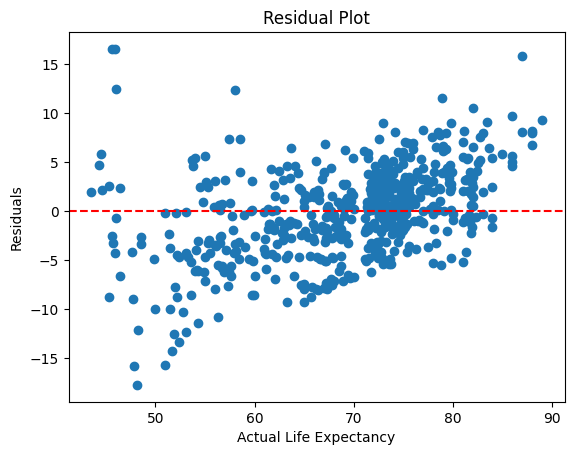

In [ ]:
#Evaluate how well the model performs across the range of predictions. Add this code to visualize residuals:

import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Random Forest Mean Squared Error: 5.54
Random Forest R-squared: 0.94
Random Forest Mean Absolute Error: 1.62

Feature Importances:
               Feature  Importance
4             HIV/AIDS    0.622452
0            Schooling    0.177894
2                  BMI    0.059347
3  thinness 1-19 years    0.056496
6    Total expenditure    0.027959
5           Diphtheria    0.026790
1                  GDP    0.019833
7          Hepatitis B    0.009229


<ipython-input-5-6daec251949c>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')


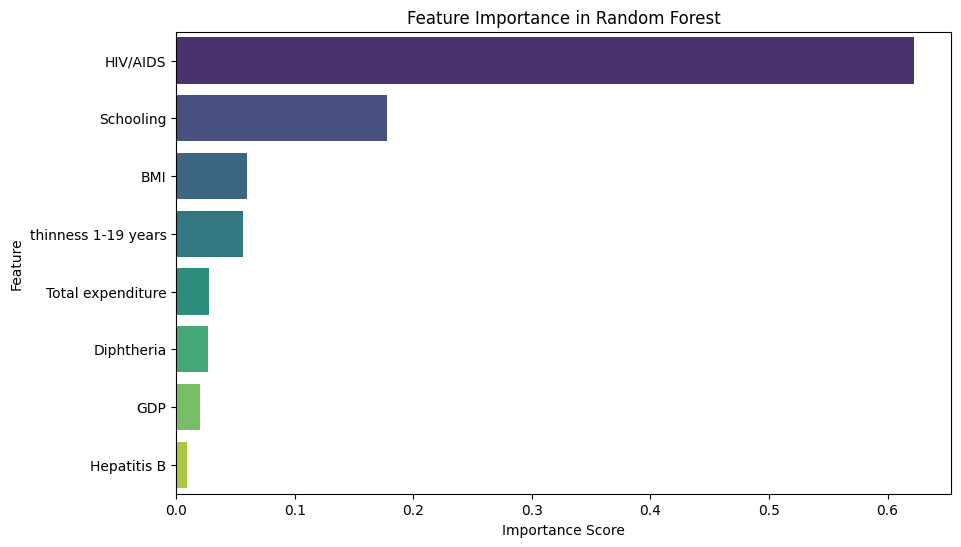

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Train-Test Split (from previous step)
# X_train, X_test, y_train, y_test already defined

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest R-squared: {rf_r2:.2f}")
print(f"Random Forest Mean Absolute Error: {rf_mae:.2f}")

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
#Optimize the hyperparameters using RandomizedSearchCV:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=param_grid,
                                      n_iter=50,
                                      scoring='r2',
                                      cv=3,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the search to the data
rf_random_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters for Random Forest:")
print(rf_random_search.best_params_)

# Train the model with best parameters
best_rf_model = rf_random_search.best_estimator_

# Evaluate the tuned model
best_rf_y_pred = best_rf_model.predict(X_test)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)
print(f"\nTuned Random Forest R-squared: {best_rf_r2:.2f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Parameters for Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}

Tuned Random Forest R-squared: 0.94


That’s an excellent result! An R-squared value of 0.94 indicates the tuned Random Forest model explains 94% of the variance in life expectancy, which is very strong for this type of regression task.

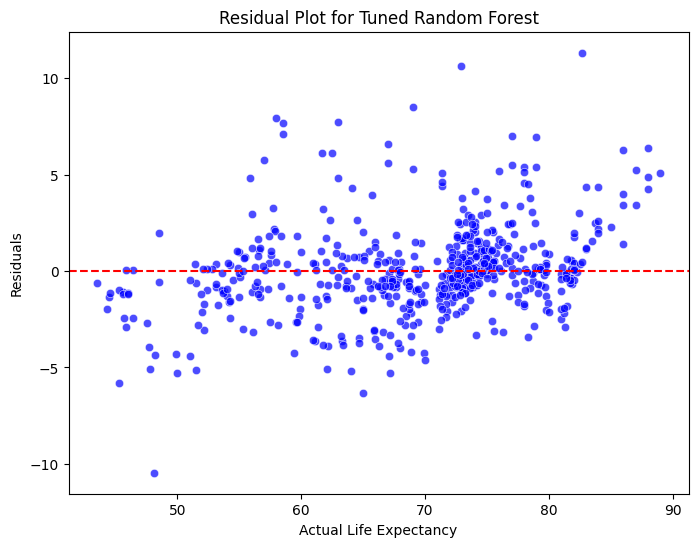

In [ ]:
# Residual Analysis
residuals = y_test - best_rf_y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot for Tuned Random Forest")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Residuals")
plt.show()


In [ ]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"\nXGBoost Mean Squared Error: {xgb_mse:.2f}")
print(f"XGBoost R-squared: {xgb_r2:.2f}")



XGBoost Mean Squared Error: 5.53
XGBoost R-squared: 0.94


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='r2')
print("\nRandom Forest Cross-Validation R-squared Scores:")
print(rf_cv_scores)
print(f"Average R-squared: {rf_cv_scores.mean():.2f}")

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=10, scoring='r2')
print("\nXGBoost Cross-Validation R-squared Scores:")
print(xgb_cv_scores)
print(f"Average R-squared: {xgb_cv_scores.mean():.2f}")



Random Forest Cross-Validation R-squared Scores:
[0.77533056 0.84122316 0.81031775 0.8179971  0.7899252  0.88902152
 0.881923   0.69897062 0.78432772 0.88231315]
Average R-squared: 0.82

XGBoost Cross-Validation R-squared Scores:
[0.71936691 0.82467608 0.80000618 0.80583226 0.77779731 0.861431
 0.85650839 0.67119728 0.77888489 0.87867468]
Average R-squared: 0.80


Insights from Cross-Validation Results:
Random Forest:

Cross-validation R-squared scores: [0.7753, 0.8412, ..., 0.8823]
Average R-squared: 0.82
Random Forest consistently performs well, achieving a higher average R-squared.
XGBoost:

Cross-validation R-squared scores: [0.7194, 0.8247, ..., 0.8787]
Average R-squared: 0.80
While XGBoost is competitive, it performs slightly worse than Random Forest on this dataset.


Expected Outcome
A comprehensive residual analysis to verify model quality.
Insights into feature importance for actionable understanding.
A trained and validated Gradient Boosting model for comparison.
A comparison of cross-validation results to select the best model.
The best model is saved and ready for deployment.

In [ ]:
import joblib

# Save the best model
if rf_cv_scores.mean() > xgb_cv_scores.mean():
    best_model = best_rf_model
    joblib.dump(best_rf_model, "best_model_random_forest.pkl")
    print("Random Forest model saved as 'best_model_random_forest.pkl'")
else:
    best_model = xgb_model
    joblib.dump(xgb_model, "best_model_xgboost.pkl")
    print("XGBoost model saved as 'best_model_xgboost.pkl'")


Random Forest model saved as 'best_model_random_forest.pkl'


THE **RANDOM FOREST** IS THE BEST OF THREE(LINEAR REGRESSION, GRADIENT BOOSTING AND RANDOM FOREST)

<ipython-input-11-bef97953c056>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')


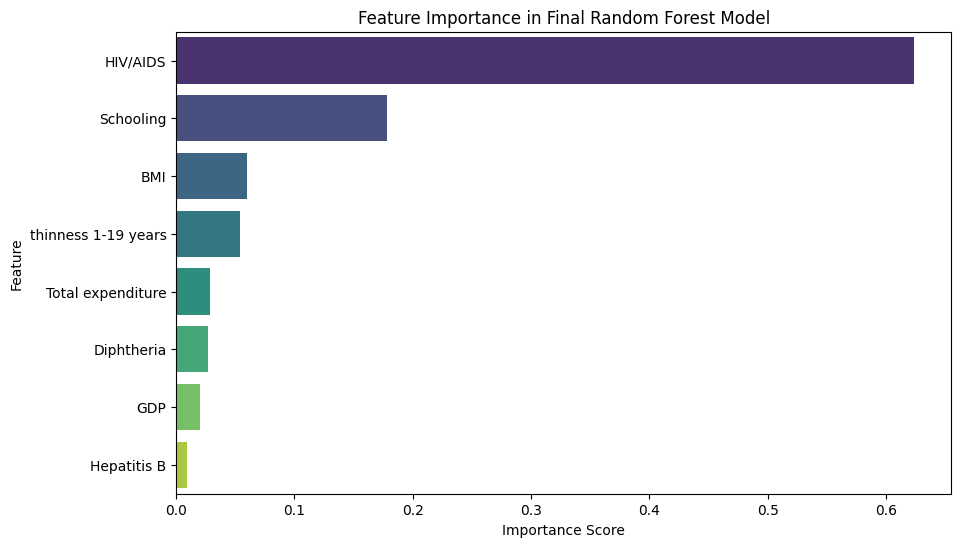


Feature Importances:
               Feature  Importance
4             HIV/AIDS    0.623878
0            Schooling    0.178111
2                  BMI    0.059821
3  thinness 1-19 years    0.053574
6    Total expenditure    0.028278
5           Diphtheria    0.027211
1                  GDP    0.020041
7          Hepatitis B    0.009087


In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette='viridis')
plt.title('Feature Importance in Final Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("\nFeature Importances:")
print(feature_importances)
